<a href="https://colab.research.google.com/github/ifrah9/CodeClauseInternship_frauddetection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('/content/creditcard.csv')

In [3]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


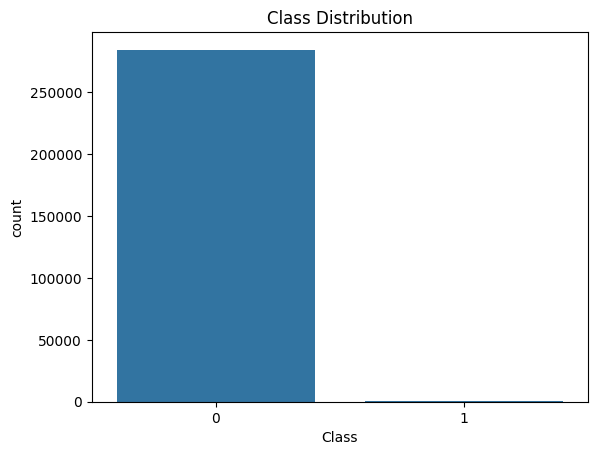

In [6]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

In [7]:
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

In [8]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.3, random_state=42)


In [11]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [12]:
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Logistic Regression Confusion Matrix:
 [[83013  2136]
 [ 6928 78512]]


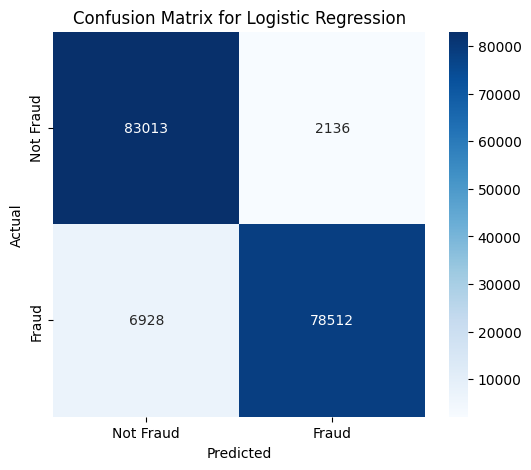

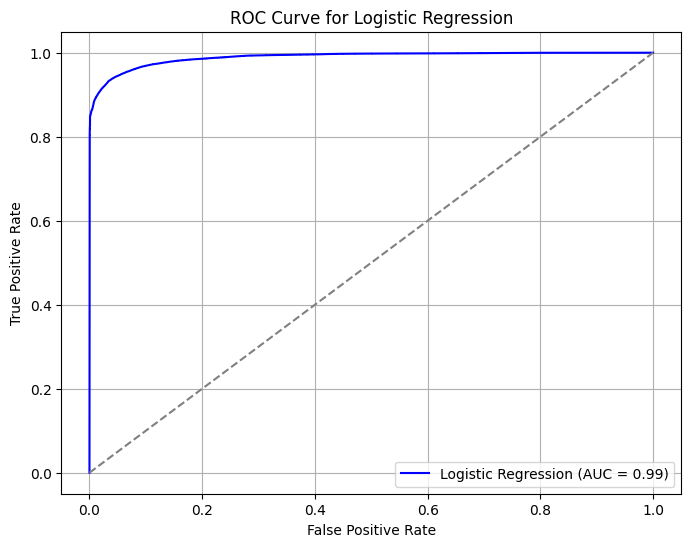

In [13]:
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("Logistic Regression Confusion Matrix:\n", lr_cm)
plot_confusion_matrix(lr_cm, "Logistic Regression")
plot_roc_curve(y_test, lr_probabilities, "Logistic Regression")



Training Decision Tree...
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     85149
           1       0.97      0.94      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Decision Tree Confusion Matrix:
 [[82288  2861]
 [ 5123 80317]]


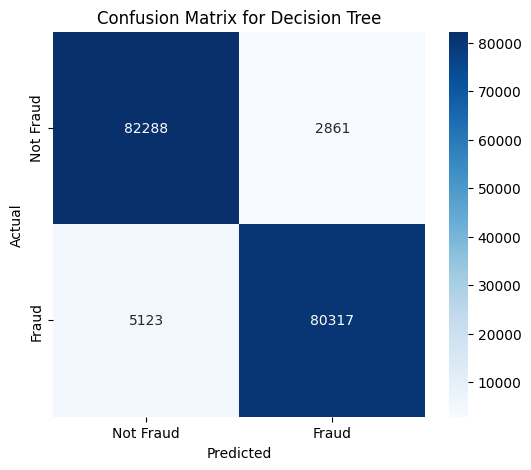

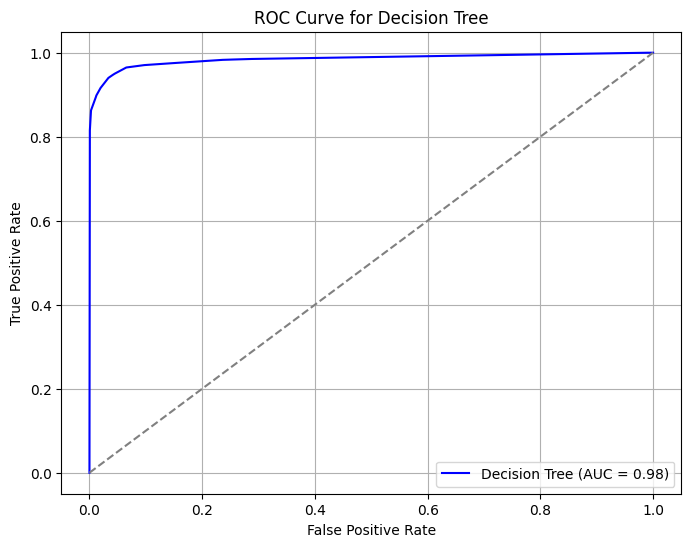

In [14]:
print("\nTraining Decision Tree...")
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_probabilities = dt_model.predict_proba(X_test)[:, 1]
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", dt_cm)
plot_confusion_matrix(dt_cm, "Decision Tree")
plot_roc_curve(y_test, dt_probabilities, "Decision Tree")



Training k-NN...
k-NN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

k-NN Confusion Matrix:
 [[84963   186]
 [    0 85440]]


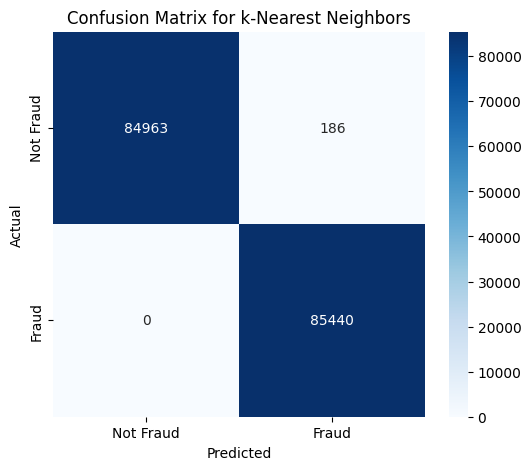

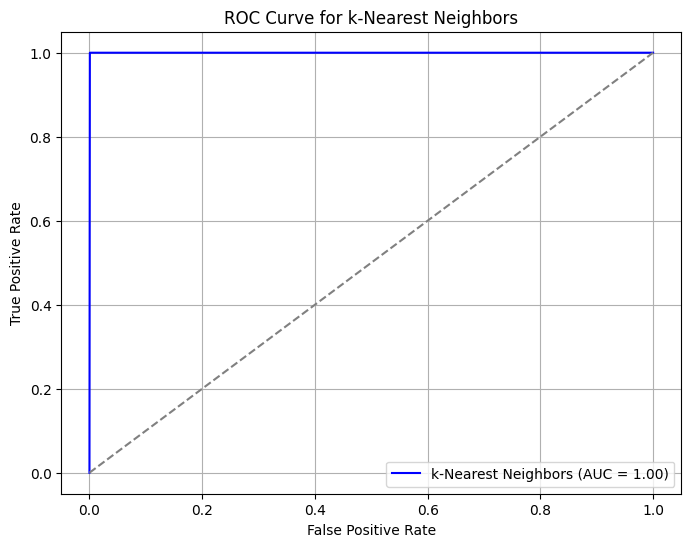

In [15]:
print("\nTraining k-NN...")
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default neighbors = 5, can be tuned
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_probabilities = knn_model.predict_proba(X_test)[:, 1]
knn_cm = confusion_matrix(y_test, knn_predictions)
print("k-NN Classification Report:\n", classification_report(y_test, knn_predictions))
print("k-NN Confusion Matrix:\n", knn_cm)
plot_confusion_matrix(knn_cm, "k-Nearest Neighbors")
plot_roc_curve(y_test, knn_probabilities, "k-Nearest Neighbors")